In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets



In [3]:
def createIRIS():
    data=datasets.load_iris()
    U=pd.DataFrame(data["data"],columns=data["feature_names"])
    labels=pd.Series(data["target_names"])
    U["target"]=data["target"]
    U["label"]= [labels[i] for i in data["target"]]
    return U

In [4]:
U=createIRIS()

In [5]:
from sklearn.model_selection import train_test_split
U=createIRIS()
X=U[U.columns[:-2]]
Y=U[U.columns[-2]]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

# $k$-Nearest Neighbour
$\DeclareMathOperator{\argmin} {arg min}
\DeclareMathOperator{\argmax} {arg max}$
- Let $m\in\mathbb{N}^*$ the number of features.
- Let $n \in \mathbb{N}^*$ the number of samples
- Let $X \in \mathbb{R}^{n\times m}$
- Let $d$ be a distance (or pseudo-distance) function on the metric space $\mathbb{R}^m$
- Let $k \in \mathbb{N}^*$ the number of neighbours to consider 
- $(\omega _p)_{p\in \left\{1,..,k \right\}} \in [0,1]^{k}/\sum_{p=1}^{k}\omega_p = 1$
- Let $S \in \mathscr{F}\left(\mathbb{R}^{n},\mathbb{R}^{m}\right)/\forall x \in \mathbb{R}^n,\forall i \in \left\{1,..,n\right\}, S_i(x) = d(X_i,x)$
- Let $x\in \mathbb{R}^m,$ we will order $(S_p(x))_{p\in \{1,..,n\} }$ with respect to the total order $\le$:
$$ S_{m_1}(x) \le S_{m_i}(x) \le .. \le S_{m_n}(x) $$

## 1. Classification
- Let $p\in\mathbb{N}^*$ the number of classes
- Let $Y \in \{1,..,p\}^{n}$
- The predicted class of $x$ will be:
$$ \tilde{y}=\arg \max_{l\in \{1,..,p\}}\sum_{\substack{i=1 \\ Y_{m_i}=l}}^{k}\omega_{m_i}$$
### For $k$=1, this can be simplified to:
$$ \begin{split} \tilde{y}=Y_s \\ s=\arg \min_{i\in \{1,..,n\}}S_i(x) \end{split}$$

## 2. Regression
- Let $p\in\mathbb{N}^*$ the number of classes
- Let $Y \in F$ where $F$ is a vector space.

We have:
$$ \tilde{y}=\frac{\sum_{i=1}^{k}\omega_{m_i}Y_{m_i}}{\sum_{i=1}^{k}\omega_{m_i}}$$

### For $k$=1, this can be simplified to:
$$ \begin{split} \tilde{y}=Y_s \\ s=\arg \min_{i\in \{1,..,n\}}S_i(x) \end{split}$$

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import heapq

        

class NearestNeighbourClassifier:
    def fit(self,X,Y):
        self.X=np.array(X)
        self.Y=np.array(Y)
    def predictOne(self,x):
        S=self.X-x
        p=np.argmin(np.sum(S**2,axis=1))
        return self.Y[p]
    def predict(self,X):
        return np.apply_along_axis(self.predictOne,axis=-1,arr=X)
    def score(self,X,Y):
        return np.mean(self.predict(X)==Y)
    pass


class KNearestNeighbourClassifier:
    def __init__(self,k=5,w=None,d= lambda X1,X2:np.sqrt(np.sum((X2-X1)**2,axis=1))):
        self.k=k
        self.w=w
        self.d=d
    def fit(self,X,Y):
        self.X=np.array(X)
        self.Y=np.array(Y)
    def predictOne(self,x):
        S=self.X-x
        R=heapq.nsmallest(self.k,zip(self.d(self.X,x),range(0,self.X.shape[0])))
        P=np.zeros(self.k)
        w=None
        for s in range(0,self.k):
            P[s]=self.Y[R[s][1]]
        if self.w== None:
            w=[1]*self.k
        elif callable(self.w):
            w=[self.w(i) for i in range(0,self.k)]
        else: w=self.w
#        M=pd.Series(P)
#        return M.value_counts().idxmax()
        df=pd.DataFrame([P,w],index=["Y","p"]).T
        V=df.groupby("Y").sum()
        return V["p"].idxmax()
    def predict(self,X):
        return np.apply_along_axis(self.predictOne,axis=-1,arr=X)
    def score(self,X,Y):
        return np.mean(self.predict(X)==Y)
    pass


In [7]:
def std_distance(X1,X2,std):
    S=X2-X1
    S=S/np.array(std)
    return np.sqrt(np.sum(S**2,axis=1))
    
    

model=KNearestNeighbourClassifier(10,d=lambda X1,X2:std_distance(X1,X2,np.std(X_train,axis=0)),w=lambda i:np.float_power(i+1,-1/8))
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9210526315789473

In [8]:
np.array([np.float_power(i+1,-1/5) for i in range(100)])/np.sum(np.array([np.float_power(i+1,-1/5) for i in range(100)]))

array([0.02031345, 0.01768389, 0.01630645, 0.01539472, 0.01472278,
       0.01419559, 0.01376462, 0.01340188, 0.01308987, 0.01281692,
       0.01257492, 0.01235798, 0.01216172, 0.01198279, 0.01181858,
       0.01166701, 0.01152641, 0.01139539, 0.01127283, 0.01115778,
       0.01104943, 0.0109471 , 0.01085021, 0.01075825, 0.01067077,
       0.01058739, 0.01050778, 0.01043163, 0.01035867, 0.01028868,
       0.01022142, 0.01015673, 0.01009441, 0.01003432, 0.00997631,
       0.00992026, 0.00986605, 0.00981357, 0.00976272, 0.00971341,
       0.00966556, 0.00961909, 0.00957393, 0.00953001, 0.00948727,
       0.00944566, 0.00940512, 0.0093656 , 0.00932705, 0.00928944,
       0.00925273, 0.00921686, 0.00918182, 0.00914755, 0.00911405,
       0.00908126, 0.00904917, 0.00901775, 0.00898697, 0.00895681,
       0.00892725, 0.00889827, 0.00886984, 0.00884194, 0.00881457,
       0.00878769, 0.0087613 , 0.00873538, 0.00870991, 0.00868489,
       0.00866028, 0.00863609, 0.0086123 , 0.0085889 , 0.00856

In [10]:
KNeighborsClassifier(n_neighbors=100).fit(X_train,Y_train).score(X_test,Y_test)

0.7105263157894737

# All Neighbours
$\DeclareMathOperator{\argmin} {arg min}
\DeclareMathOperator{\argmax} {arg max}$
- Let $m\in\mathbb{N}^*$ the number of features.
- Let $n \in \mathbb{N}^*$ the number of samples
- Let $X \in \mathbb{R}^{n\times m}$
- Let $d$ be a distance (or pseudo-distance) function on the metric space $\mathbb{R}^m$
- Let $S \in \mathscr{F}\left(\mathbb{R}^{n},\mathbb{R}^{m}\right)/\forall x \in \mathbb{R}^n,\forall i \in \left\{1,..,n\right\}, S_i(x) = d(X_i,x)$
- Let $x\in \mathbb{R}^m$
- Let $f$ be a decreasing function
## 1. Classification
- Let $p\in\mathbb{N}^*$ the number of classes
- Let $Y \in \{1,..,p\}^{n}$
- The predicted class of $x$ will be:
$$ \tilde{y}=\arg \max_{l\in \{1,..,p\}}\sum_{\substack{i=1 \\ Y_{i}=l}}^{n}f\left(S_i(x)\right)$$

## 2. Regression
- Let $p\in\mathbb{N}^*$ the number of classes
- Let $Y \in F$ where $F$ is a vector space.

We have:
$$ \tilde{y}=\frac{\sum_{i=1}^{n}f\left(S_i(x)\right)Y_{i}}{\sum_{i=1}^{n}f\left(S_i(x)\right)}$$

In [11]:
import scipy.optimize

class AllNeighboursClassifier:
    def __init__(self,f,df,d= lambda X1,X2:np.sqrt(np.sum((X2-X1)**2,axis=1)),**kwargs):
        self.f=f
        self.d=d
        self.kwargs=kwargs
    def fit(self,X,Y):
        self.X=np.array(X)
        self.Y=np.array(Y)
        scipy.optimize.least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)
    def predictOne(self,x):
        S=self.d(self.X,x)    
        data=pd.DataFrame([Y,self.f(S,**self.kwargs)],index=["Y","p"]).T
        V=data.groupby("Y").sum()
        return V["p"].idxmax()
    def predict(self,X):
        return np.apply_along_axis(self.predictOne,axis=-1,arr=X)
    def score(self,X,Y):
        return np.mean(self.predict(X)==Y)
    pass

In [12]:
def g(x,mu,sig):
    return np.exp(-(x-mu)**2/(2*sig**2))/(sig*np.sqrt(2*np.pi))

def dg(x,mu,sig):
    return [(x-mu),(x-mu)/sig**2-1]*g(x,mu,sig)/sig**2

AllNClassifier = AllNeighboursClassifier(f=g,df=dg,mu=0,sig=1)
AllNClassifier.fit(X_train,Y_train)
AllNClassifier.score(X_train,Y_train)

NameError: name 'fun' is not defined

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
model=KNearestNeighbourClassifier(k=5)
U=X[X.columns[2:4]]
model.fit(U,Y)


(150, 150)


<ipython-input-14-383e77c1e84b>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(U_mesh[:,:,0], U_mesh[:,:,1], np.tanh(.225*Y_mesh),alpha=.65)


Text(0.5, 1.0, 'Lineary separable data')

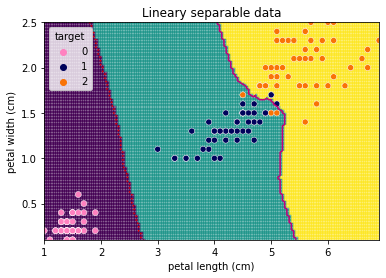

In [14]:
fig,ax=plt.subplots()
x=np.linspace(np.min(U[U.columns[0]]),np.max(U[U.columns[0]]),150)
y=np.linspace(np.min(U[U.columns[1]]),np.max(U[U.columns[1]]),150)
U_mesh=np.array(np.meshgrid(x,y)).transpose(1,2,0)
Y_mesh=model.predict(U_mesh.reshape((-1,2))).reshape((U_mesh.shape[0],U_mesh.shape[1]))
print(Y_mesh.shape)

c = ax.pcolormesh(U_mesh[:,:,0], U_mesh[:,:,1], np.tanh(.225*Y_mesh),alpha=.65)
c = ax.contour(U_mesh[:,:,0], U_mesh[:,:,1], Y_mesh, levels=[0,1,2],
               colors=["xkcd:red","xkcd:magenta","xkcd:blue"],linestyles=["dotted","solid","dotted"])
sns.scatterplot(x=U[U.columns[0]], y=U[U.columns[1]], hue=Y,ax=ax,palette=["xkcd:pink","xkcd:dark blue","xkcd:orange"]);
ax.set_title("Lineary separable data")


(150, 150)


<ipython-input-15-6b02d46567b2>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(R_mesh[:,:,0], R_mesh[:,:,1], np.tanh(.225*Y_mesh),alpha=.65)
<ipython-input-15-6b02d46567b2>:15: UserWarning: No contour levels were found within the data range.
  c = ax.contour(R_mesh[:,:,0], R_mesh[:,:,1], Y_mesh, levels=[0,1,2],


Text(0.5, 1.0, 'Lineary inseparable data')

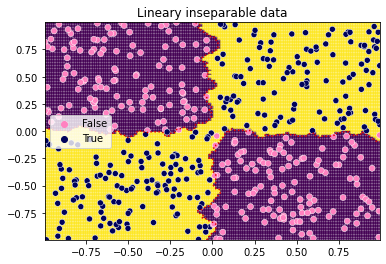

In [15]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

R=np.random.uniform(-1,1,[500,2])
R=R.astype(np.float64)
model.fit(R,(R[:,0]*R[:,1])>0)
fig,ax=plt.subplots()
x=np.linspace(np.min(R[:,0]),np.max(R[:,0]),150)
y=np.linspace(np.min(R[:,1]),np.max(R[:,1]),150)
R_mesh=np.array(np.meshgrid(x,y)).transpose(1,2,0)
Y_mesh=model.predict(R_mesh.reshape((-1,2))).reshape((R_mesh.shape[0],R_mesh.shape[1]))
print(Y_mesh.shape)

c = ax.pcolormesh(R_mesh[:,:,0], R_mesh[:,:,1], np.tanh(.225*Y_mesh),alpha=.65)
c = ax.contour(R_mesh[:,:,0], R_mesh[:,:,1], Y_mesh, levels=[0,1,2],
               colors=["xkcd:red","xkcd:magenta","xkcd:blue"],linestyles=["dotted","solid","dotted"])
sns.scatterplot(x=R[:,0], y=R[:,1], hue=(R[:,0]*R[:,1])>0,ax=ax,palette=["xkcd:pink","xkcd:dark blue"]);
ax.set_title("Lineary inseparable data")